In [1]:
import os
import sys
import numpy as np
import matplotlib
matplotlib.use('nbagg')
from matplotlib import style
style.use('ggplot')
import matplotlib.pyplot as plt

from astropy import units as u
from astropy.table import Table, vstack
from astropy.io import ascii
from astropy.modeling import models, fitting, custom_model

from elcoll_utils import colnames, keys, titles, ylabels, elcoll_read, elcoll_plot, elcoll_model, elcoll_results

<IPython.core.display.Javascript object>


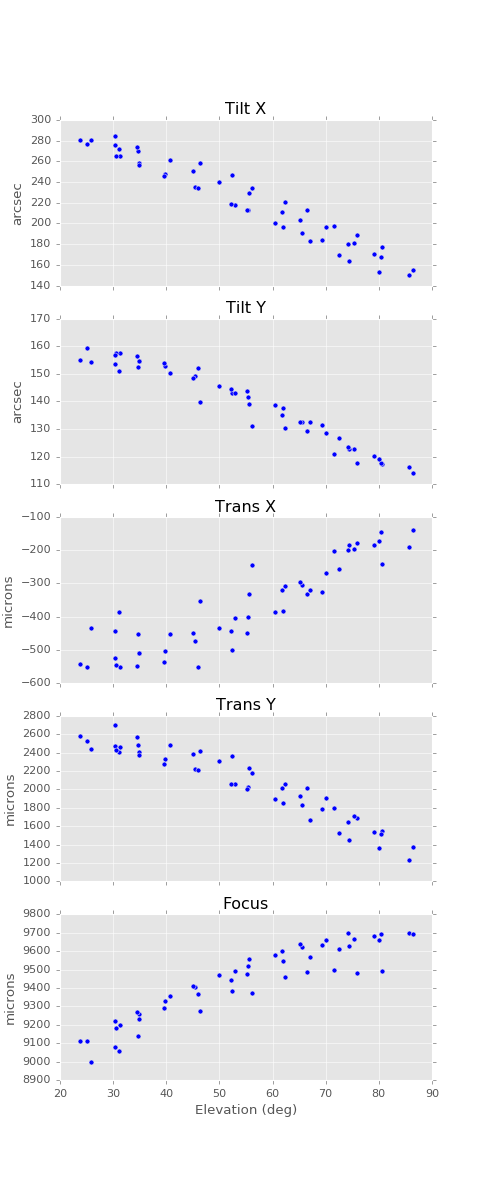

In [2]:
# this one was taken at the end of the night after it cleared
set2 = elcoll_read("data/ELCOLL.0.20170110")

# this was taken early in the night through some thick clouds at times and poor seeing
set1 = elcoll_read("data/ELCOLL.1.20170110")

# stack them verically into single dataset 
tot = vstack([set1, set2])

elcoll_plot(tot)

In [3]:
fitter = fitting.LevMarLSQFitter()
elcoll = elcoll_model()
mods = {}

In [4]:
for k in keys:
    mods[k] = fitter(elcoll, x=tot['el'], y=tot['oss'], z=tot[k])

In [5]:
elcoll_results(mods)

Tilt X: -39.54*sin(el) +128.67*cos(el) +3.13*T_oss +160.75
Tilt Y: +5.52*sin(el) +56.47*cos(el) -1.05*T_oss +110.85
Trans X: -190.26*sin(el) -599.04*cos(el) +8.82*T_oss +47.47
Trans Y: +463.36*sin(el) +1802.56*cos(el) +18.65*T_oss +582.79
Focus: +1034.03*sin(el) -25.41*cos(el) -32.70*T_oss +8866.87


<IPython.core.display.Javascript object>


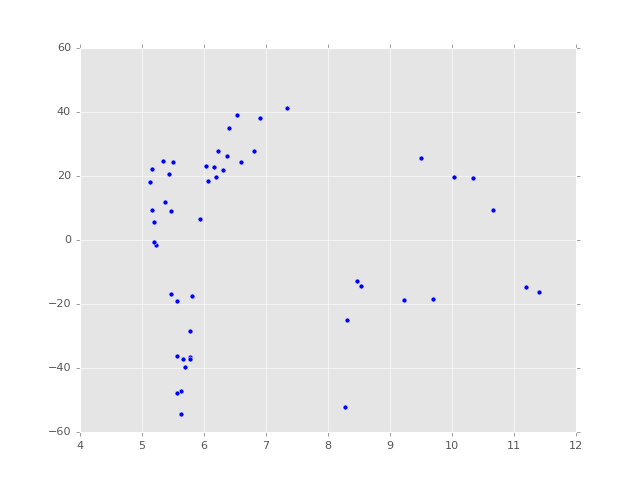

In [6]:
#plt.scatter(tot['el'], tot['focus'])
plt.scatter(tot['oss'], tot['focus'] - mods['focus'](tot['el'], tot['oss']))
plt.show()